#Handling duplicate, missing, or invalid data

###About the data


In this notebook, we will using daily weather data that was taken from the National Centers for Environmental Information (NCEI) API and altered to introduce many common
problems faced when working with data.


*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the
NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for the NCEI weather API to find the updated one*

###Background on the data

Data meanings:
- PRCP : precipitation in millimeters
- SNOW : snowfall in millimeters
- SNWD : snow depth in millimeters
- TMAX : maximum daily temperature in Celsius
- TMIN : minimum daily temperature in Celsius
- TOBS : temperature at time of observation in Celsius
- WESF : water equivalent of snow in millimeters


Some important facts to get our bearings:
- According to the National Weather Service, the coldest temperature ever recorded in Central Park was -15°F (-26.1°C) on February 9, 1934: source
-- The temperature of the Sun's photosphere is approximately 5,505°C:

###Setup

We need to import pandas and read in the long-format data to get started:

In [1]:
import pandas as pd
df = pd.read_csv('/content/data/dirty_data.csv')

###Finding problematic data

A good first step is to look at some rows:

In [2]:
df.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


Looking at summary statistics can reveal strange or missing values:

In [3]:
df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF
count,765.000000,577.000000,577.0,765.000000,765.000000,398.000000,11.000000
mean,5.360392,4.202773,NaN,2649.175294,-15.914379,8.632161,16.290909
std,10.002138,25.086077,NaN,2744.156281,24.242849,9.815054,9.489832
min,0.000000,0.000000,-inf,-11.700000,-40.000000,-16.100000,1.800000
25%,0.000000,0.000000,NaN,13.300000,-40.000000,0.150000,8.600000
50%,0.000000,0.000000,NaN,32.800000,-11.100000,8.300000,19.300000
75%,5.800000,0.000000,NaN,5505.000000,6.700000,18.300000,24.900000
max,61.700000,229.000000,inf,5505.000000,23.900000,26.100000,28.700000


The info() method can pinpoint missing values and wrong data types:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


We can use pd.isnull() / pd.isna() or the isna() / isnull() method of the series to find nulls:

In [6]:
contain_nulls = df[
  df.SNOW.isnull() | df.SNWD.isna()\
  | pd.isnull(df.TOBS) | pd.isna(df.WESF)\
  | df.inclement_weather.isna()
  ]
contain_nulls.shape[0]

765

In [7]:
contain_nulls.head(10)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
7,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
9,2018-01-05T00:00:00,?,0.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN


Note that we can't check if we have NaN like this:

In [8]:
df[df.inclement_weather == 'NaN'].shape[0]

0

This is because it is actually np.nan . However, notice this also doesn't work:

In [9]:
import numpy as np
df[df.inclement_weather == np.nan].shape[0]

0

We have to use one of the methods discussed earlier for this to work

In [10]:
df[df.inclement_weather.isna()].shape[0]

357

We can find -inf / inf by comparing to -np.inf / np.inf :

577

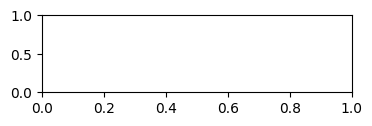

In [11]:
df[df.SNWD.isin([-np.inf, np.inf])].shape[0]

Rather than do this for each column, we can write a function that will use a dictionary comprehension to check all the columns for us:

In [13]:
import numpy as np
def get_inf_count(df):
  """Find the number of inf/-inf values per column in the dataframe"""
  return {
    col : df[df[col].isin([np.inf, -np.inf])].shape[0] for col in df.columns
  }

get_inf_count(df)

{'date': 0,
 'station': 0,
 'PRCP': 0,
 'SNOW': 0,
 'SNWD': 577,
 'TMAX': 0,
 'TMIN': 0,
 'TOBS': 0,
 'WESF': 0,
 'inclement_weather': 0}

Before we can decide how to handle the infinite values of snow depth, we should look at the summary statistics for snowfall which form a big part in determining the snow
depth:

In [14]:
pd.DataFrame({
  'np.inf Snow Depth': df[df.SNWD == np.inf].SNOW.describe(),
  '-np.inf Snow Depth': df[df.SNWD == -np.inf].SNOW.describe()
}).T

,count,mean,std,min,25%,50%,75%,max
np.inf Snow Depth,24.0,101.041667,74.498018,13.0,25.0,120.5,152.0,229.0
-np.inf Snow Depth,553.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Let's now look into the date and station columns. We saw the ? for station earlier, so we know that was the other unique value. However, we see that some dates are
present 8 times in the data and we only have 324 days meaning we are also missing days:

In [15]:
df.describe(include='object')

,date,station,inclement_weather
count,765,765,408
unique,324,2,2
top,2018-07-05T00:00:00,GHCND:USC00280907,False
freq,8,398,384


We can use the duplicated() method to find duplicate rows:

In [16]:
df[df.duplicated()].shape[0]

284

The default for keep is 'first' meaning it won't show the first row that the duplicated data was seen in; we can pass in False to see it though:

In [17]:
df[df.duplicated(keep=False)].shape[0]

482

We can also specify the columns to use:

In [18]:
df[df.duplicated(['date', 'station'])].shape[0]

284

Let's look at a few duplicates. Just in the few values we see here, we know that the top 4 are actually in the data 6 times because by default we aren't seeing their first
occurrence:

In [19]:
df[df.duplicated()].head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True


###Mitigating Issues

####Handling duplicated data

Since we know we have NY weather data and noticed we only had two entries for station , we may decide to drop the station column because we are only interested in
the weather data. However, when dealing with duplicate data, we need to think of the ramifications of removing it. Notice we only have data for the WESF column when the
station is ? :

In [20]:
df[df.WESF.notna()].station.unique()

array(['?'], dtype=object)

If we determine it won't impact our analysis, we can use drop_duplicates() to remove them:

In [21]:
# save this information for later
station_qm_wesf = df[df.station == '?'].WESF

# sort ? to the bottom
df.sort_values('station', ascending=False, inplace=True)

# drop duplicates based on the date column keeping the first occurrence
# which will be the valid station if it has data
df_deduped = df.drop_duplicates('date').drop(
  # remove the station column because we are done with it
  # and WESF because we need to replace it later
  columns=['station', 'WESF']
).sort_values('date').assign( # sort by the date
  # add back the WESF column which will be properly matched because of the index
  WESF=station_qm_wesf
)

df_deduped.shape

(324, 9)

Check out the 4th row, we have WESF in the correct spot thanks to the index:

In [22]:
df_deduped.head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,NaN
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,NaN
8,2018-01-04T00:00:00,20.6,229.0,inf,5505.0,-40.0,NaN,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,NaN


###Dealing with nulls

We could drop nulls, replace them with some arbitrary value, or impute them using the surrounding data. Each of these options may have ramifications, so we must choose
wisely.

We can use dropna() to drop rows where any column has a null value. The default options leave us without data:

In [23]:
df_deduped.dropna().shape

(0, 9)

If we pass how='all' , we can choose to only drop rows where everything is null, but this removes nothing:

In [24]:
df_deduped.dropna(how='all').shape

(324, 9)

We can use just a subset of columns to determine what to drop with the subset argument:

In [25]:
df_deduped.dropna(
  how='all', subset=['inclement_weather', 'SNOW', 'SNWD']
).shape

(293, 9)

This can also be performed along columns, and we can also require a certain number of null values before we drop the data:

In [26]:
df_deduped.dropna(axis='columns', thresh=df_deduped.shape[0]*.75).columns

Index(['date', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'inclement_weather'],
      dtype='object')

We can choose to fill in the null values instead with fillna() :

In [27]:
df_deduped.loc[:,'WESF'].fillna(0, inplace=True)
df_deduped.head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,0.0
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,inf,5505.0,-40.0,NaN,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,0.0


At this point we have done every we can without distorting the data. We know that we are missing dates, but if we reindex, we don't know how to fill in the NaN data. With the
weather data, we can't assume because it snowed one day that it will snow the next or that the temperature will be the same. For this reason, note that the next few examples
are just for illustrative purposes only—just because we can do something doesn't mean we should.


That being said, let's try to address some of remaining issues with the temperature data. We know that when TMAX is the temperature of the Sun, it must be because there
was no measured value, so let's replace it with NaN and then we will make an assumption that the temperature won't change drastically day-to-day. Note that this is actually
a big assumption, but it will allow us to understand how fillna() works when we provide a strategy through the method parameter. We will also do this for TMIN which
currently uses -40°C for its placeholder when we know that the coldest temperature ever recorded in NYC was -15°F (-26.1°C) on February 9, 1934.

The fillna() method gives us 2 options for the method parameter:
- 'ffill' to forward fill
- 'bfill' to back fill


Note that 'nearest' is missing because we are not reindexing.


Here, we will use 'ffill' to show how this works:

In [29]:
df_deduped.assign(
  TMAX=lambda x: x.TMAX.replace(5505, np.nan).fillna(method='ffill'),
  TMIN=lambda x: x.TMIN.replace(-40, np.nan).fillna(method='ffill')
).head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,NaN,NaN,NaN,NaN,0.0
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,inf,-4.4,-13.9,NaN,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,0.0


We can use np.nan_to_num() to turn np.nan into 0 and -np.inf / np.inf into large negative or positive finite numbers:

In [30]:
df_deduped.assign(
  SNWD=lambda x: np.nan_to_num(x.SNWD)
).head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-1.797693e+308,5505.0,-40.0,NaN,NaN,0.0
3,2018-01-02T00:00:00,0.0,0.0,-1.797693e+308,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-1.797693e+308,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,1.797693e+308,5505.0,-40.0,NaN,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,1.797693e+308,-4.4,-13.9,-13.9,True,0.0


We can couple fillna() with other types of calculations for interpolation. Here we replace missing values of TMAX with the median of all TMAX values, TMIN with the
median of all TMIN values, and TOBS to the average of the TMAX and TMIN values. Since we place TOBS last, we have access to the imputed values for TMIN and
TMAX in the calculation. WARNING: the text has a typo and fills in TMAX with TMIN's median, the below is correct.:

In [31]:
df_deduped.assign(
  TMAX=lambda x: x.TMAX.replace(5505, np.nan).fillna(x.TMAX.median()),
  TMIN=lambda x: x.TMIN.replace(-40, np.nan).fillna(x.TMIN.median()),
  # average of TMAX and TMIN
  TOBS=lambda x: x.TOBS.fillna((x.TMAX + x.TMIN) / 2)
).head()

,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
0,2018-01-01T00:00:00,0.0,0.0,-inf,22.8,0.0,11.4,NaN,0.0
3,2018-01-02T00:00:00,0.0,0.0,-inf,-8.3,-16.1,-12.2,False,0.0
6,2018-01-03T00:00:00,0.0,0.0,-inf,-4.4,-13.9,-13.3,False,0.0
8,2018-01-04T00:00:00,20.6,229.0,inf,22.8,0.0,11.4,True,19.3
11,2018-01-05T00:00:00,14.2,127.0,inf,-4.4,-13.9,-13.9,True,0.0


We can also use apply() for running the same calculation across columns. For example, let's fill all missing values with their rolling 7 day median of their values, setting the
number of periods required for the calculation to 0 to ensure we don't introduce more extra NaN values. (Rolling calculations will be covered in chapter 4.) We need to set
the date column as the index so apply() doesn't try to take the rolling 7 day median of the date:

In [32]:
df_deduped.assign(
  # make TMAX and TMIN NaN where appropriate
  TMAX=lambda x: x.TMAX.replace(5505, np.nan),
  TMIN=lambda x: x.TMIN.replace(-40, np.nan)
).set_index('date').apply(
  # rolling calculations will be covered in chapter 4, this is a rolling 7 day median
  # we set min_periods (# of periods required for calculation) to 0 so we always get a result
  lambda x: x.fillna(x.rolling(7, min_periods=0).median())
).head(10)

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
date,,,,,,,,
2018-01-01T00:00:00,0.0,0.0,-inf,NaN,NaN,NaN,NaN,0.0
2018-01-02T00:00:00,0.0,0.0,-inf,-8.30,-16.1,-12.20,False,0.0
2018-01-03T00:00:00,0.0,0.0,-inf,-4.40,-13.9,-13.30,False,0.0
2018-01-04T00:00:00,20.6,229.0,inf,-6.35,-15.0,-12.75,True,19.3
2018-01-05T00:00:00,14.2,127.0,inf,-4.40,-13.9,-13.90,True,0.0
2018-01-06T00:00:00,0.0,0.0,-inf,-10.00,-15.6,-15.00,False,0.0
2018-01-07T00:00:00,0.0,0.0,-inf,-11.70,-17.2,-16.10,False,0.0
2018-01-08T00:00:00,0.0,0.0,-inf,-7.80,-16.7,-8.30,False,0.0
2018-01-10T00:00:00,0.0,0.0,-inf,5.00,-7.8,-7.80,False,0.0


The last strategy we could try is interpolation with the interpolate() method. We specify the method parameter with the interpolation strategy to use. There are many
options, but we will stick with the default of 'linear' , which will treat values as evenly spaced and place missing values in the middle of existing ones. We have some
missing data, so we will reindex first. Look at January 9th, which we didn't have before—the values for TMAX , TMIN , and TOBS are the average of values the day prior
(January 8th) and the day after (January 10th):

In [33]:
df_deduped.assign(
  # make TMAX and TMIN NaN where appropriate
  TMAX=lambda x: x.TMAX.replace(5505, np.nan),
  TMIN=lambda x: x.TMIN.replace(-40, np.nan),
  date=lambda x: pd.to_datetime(x.date)
).set_index('date').reindex(
  pd.date_range('2018-01-01', '2018-12-31', freq='D')
).apply(
  lambda x: x.interpolate()
).head(10)

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,inclement_weather,WESF
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,NaN,0.0
2018-01-02,0.0,0.0,-inf,-8.3,-16.10,-12.20,False,0.0
2018-01-03,0.0,0.0,-inf,-4.4,-13.90,-13.30,False,0.0
2018-01-04,20.6,229.0,inf,-4.4,-13.90,-13.60,True,19.3
2018-01-05,14.2,127.0,inf,-4.4,-13.90,-13.90,True,0.0
2018-01-06,0.0,0.0,-inf,-10.0,-15.60,-15.00,False,0.0
2018-01-07,0.0,0.0,-inf,-11.7,-17.20,-16.10,False,0.0
2018-01-08,0.0,0.0,-inf,-7.8,-16.70,-8.30,False,0.0
2018-01-09,0.0,0.0,-inf,-1.4,-12.25,-8.05,NaN,0.0
2018-01-10,0.0,0.0,-inf,5.0,-7.80,-7.80,False,0.0
